In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
bc_data = load_breast_cancer()

In [10]:
print(bc_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print(bc_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [114]:
# Create dataframe
df = pd.DataFrame(np.c_[bc_data['data'], bc_data['target']],
                  columns= np.append(bc_data['feature_names'], ['target']))

In [115]:
# View first 5 rows of dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [116]:
# Make a copy of the dataframe to use later for analysis, but use filter and regex here to focus on "mean" features in visualizations

df_copy = df.copy()

df = df.drop(df.filter(regex='worst').columns, axis=1)

In [117]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.0


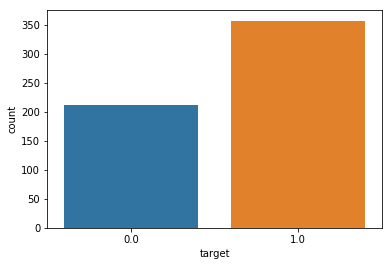

In [118]:
# Visualize target counts
sns.countplot(df['target'])

C:\Users\jcooper\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


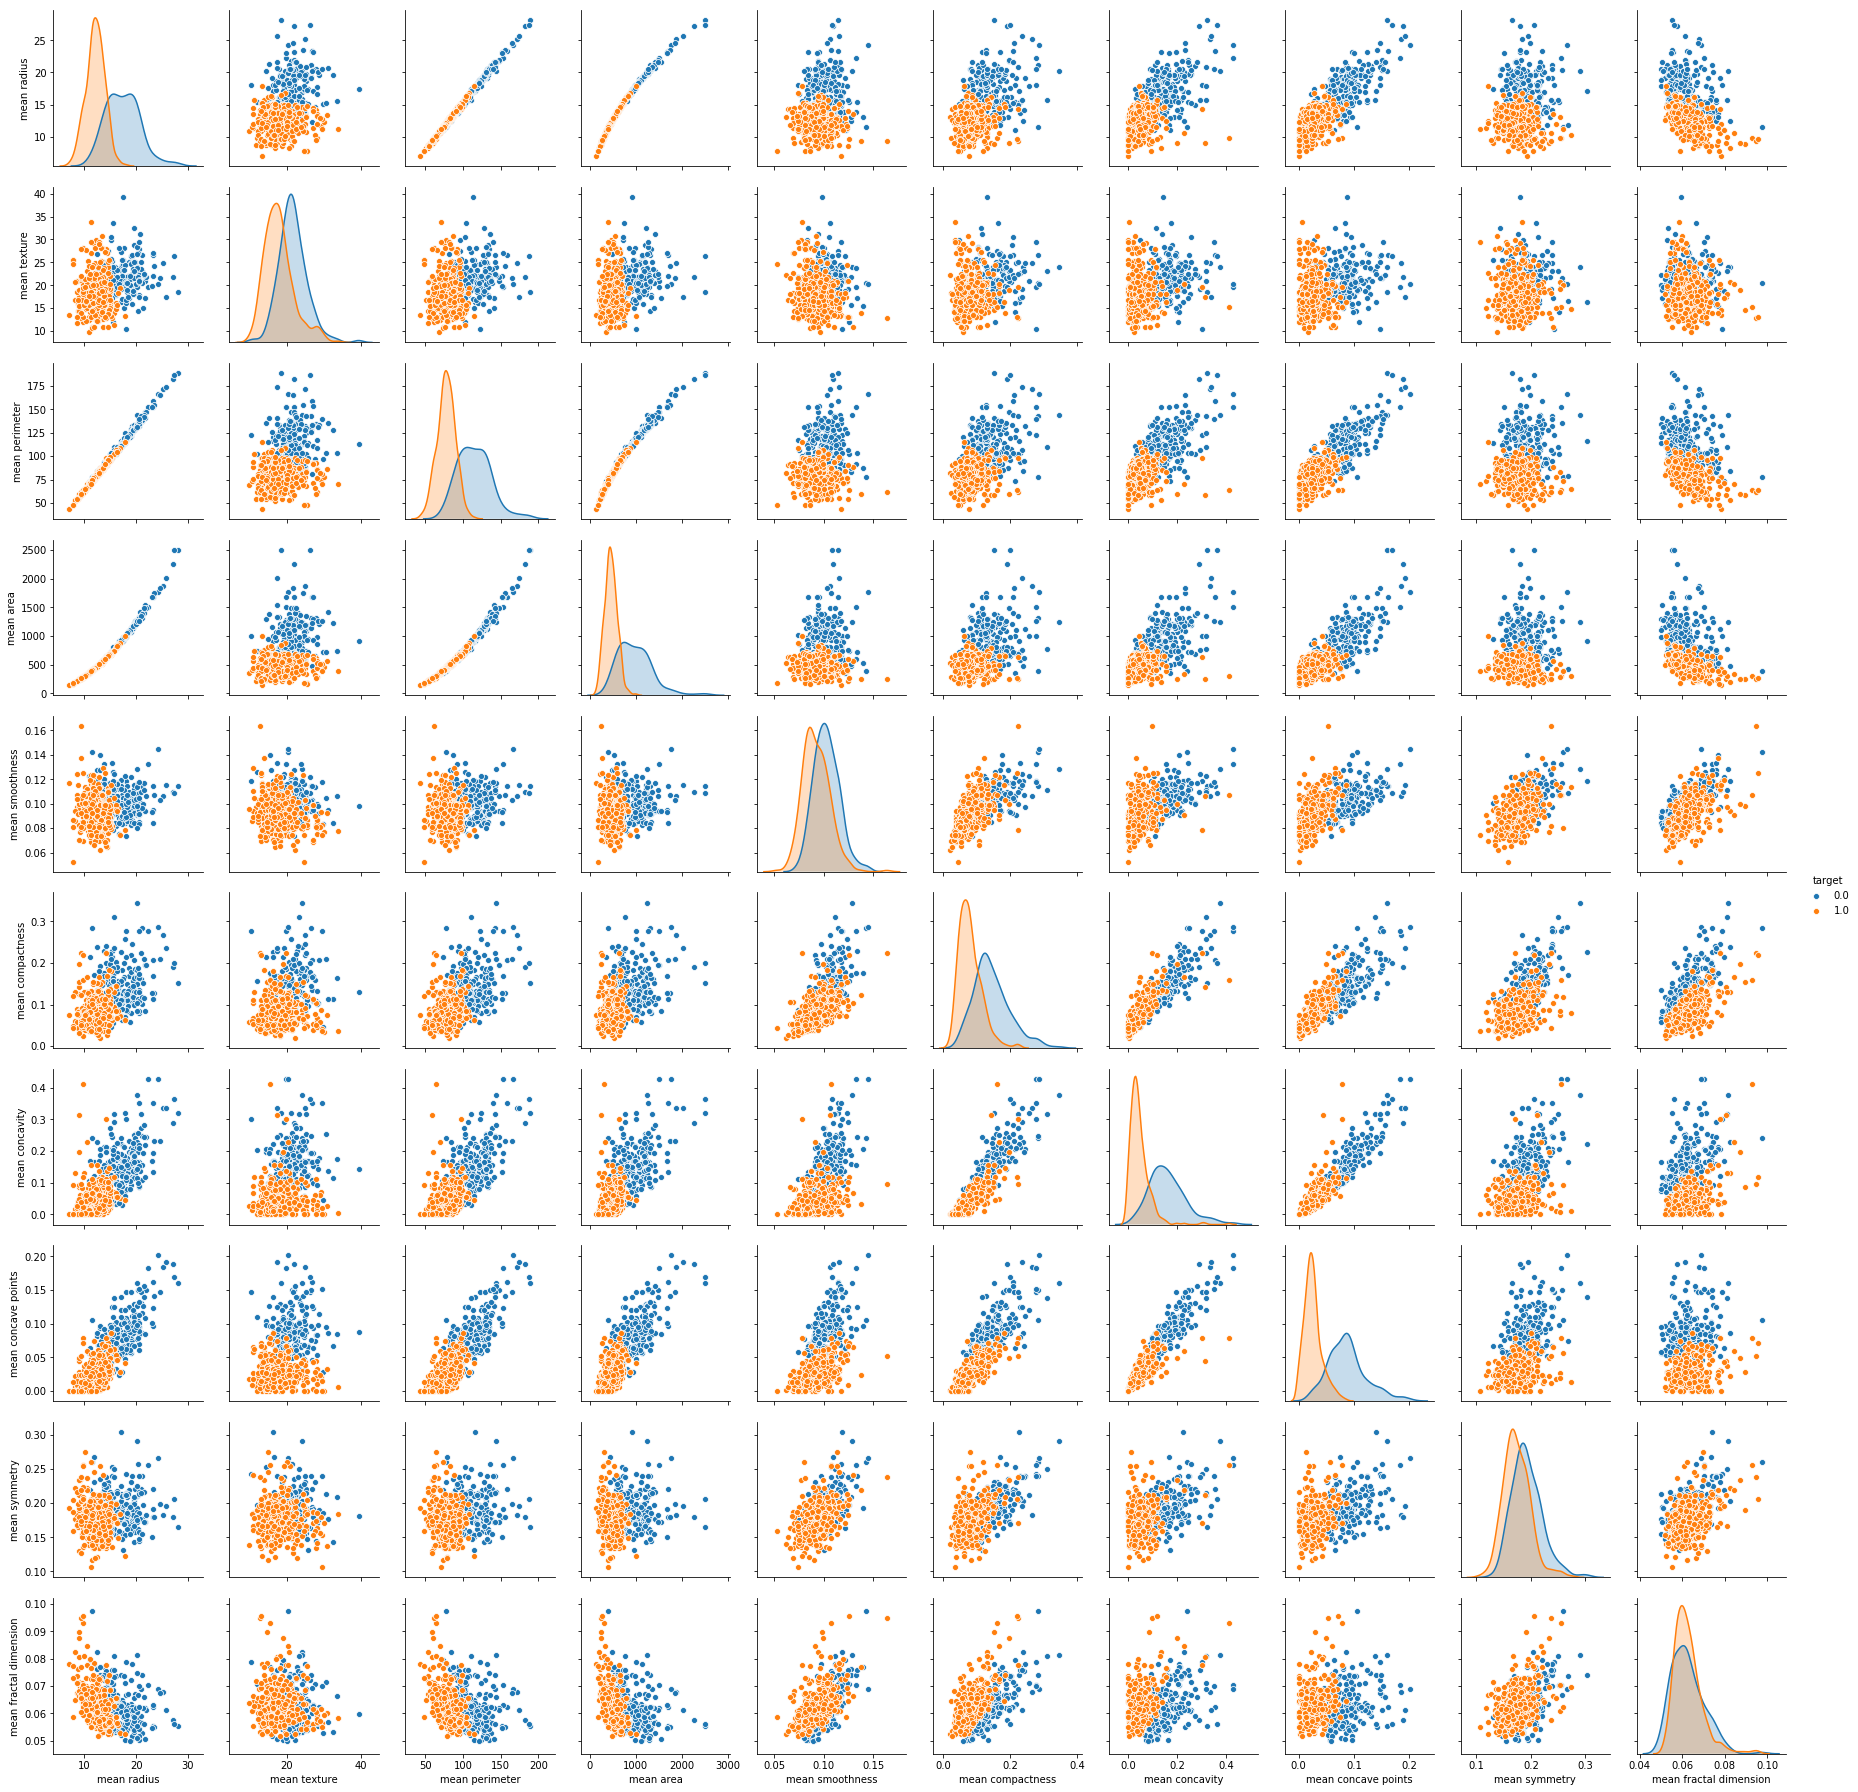

In [119]:
# Look for high level correlations and separation for columns including word "mean" only for visualization simplicity
sns.pairplot(df,hue='target',vars=df.filter(regex='mean'))

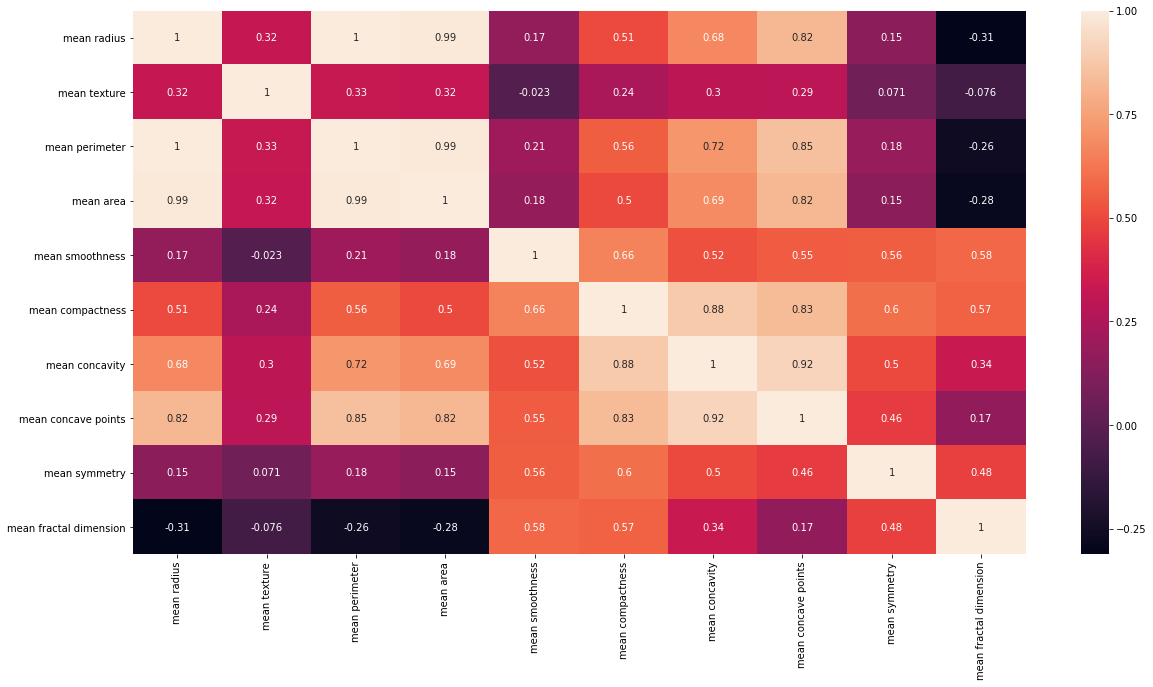

In [120]:
# Produce heatmap showing numeric correlations between features or columns containing "mean" data only to make it easier to visualize
plt.figure(figsize=(20,10))
sns.heatmap(df.filter(regex='mean').corr(),annot=True)

In [121]:
# Observation:  Mean perimeter and mean concave points, as well as mean perimeter and mean area appear to have highest correlation

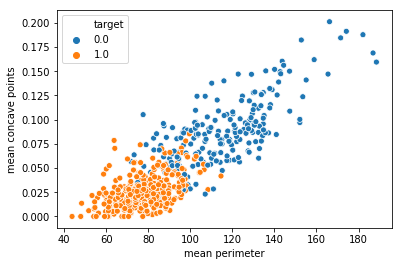

In [122]:
sns.scatterplot(df['mean perimeter'],df['mean concave points'],hue=df['target'])

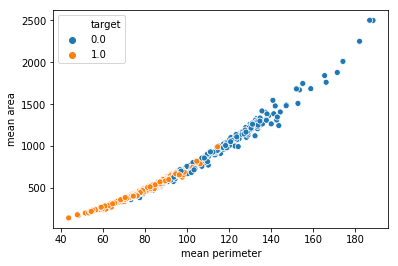

In [96]:
sns.scatterplot(df['mean perimeter'],df['mean area'],hue=df['target'])

In [126]:
# Train the model using the copy of the original dataframe

# Separate into train and test data

X = df_copy.drop('target',axis=1)
y = df_copy['target']

In [127]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [128]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [129]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [130]:
X_train.shape

(426, 30)

In [131]:
X_test.shape

(143, 30)

In [132]:
y_test.shape

(143,)

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [136]:
svc_model = SVC(gamma='auto')

In [137]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
# Evaluate the model

In [139]:
y_predict = svc_model.predict(X_test)

In [140]:
y_predict

# Output showing all 1's, so something isn't right

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

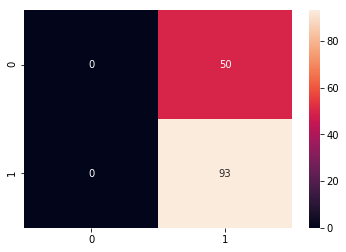

In [142]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [143]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.65      1.00      0.79        93

   micro avg       0.65      0.65      0.65       143
   macro avg       0.33      0.50      0.39       143
weighted avg       0.42      0.65      0.51       143



C:\Users\jcooper\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jcooper\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jcooper\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
# Output shows ~ 42% accuracy, so need to improve the model

In [153]:
# First going to normalize the data to get data on the same scale

min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [154]:
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
466,0.301336,0.373013,0.294808,0.166872,0.226617,0.296777,0.254217,0.174453,0.253535,0.215670,...,0.244397,0.358209,0.251457,0.123845,0.422175,0.317849,0.359744,0.405842,0.196728,0.175128
339,0.808699,0.492391,0.777793,0.680170,0.429926,0.364148,0.540769,0.700795,0.372222,0.107414,...,0.808965,0.498667,0.756960,0.668698,0.530476,0.233344,0.384904,0.717869,0.202641,0.146530
245,0.171192,0.343253,0.160226,0.082375,0.430935,0.125955,0.113191,0.152584,0.341919,0.304128,...,0.126290,0.464819,0.115892,0.053480,0.530476,0.073066,0.094329,0.231478,0.259807,0.147186
382,0.248006,0.439973,0.244288,0.129077,0.051054,0.291221,0.186106,0.148012,0.072222,0.350253,...,0.165066,0.444829,0.184023,0.074518,0.111074,0.285347,0.232588,0.375258,0.123398,0.252197
518,0.288615,0.287792,0.284117,0.148293,0.580264,0.495416,0.113051,0.263569,0.327778,0.475358,...,0.253291,0.329158,0.243538,0.120306,0.491514,0.260801,0.099521,0.376632,0.200473,0.222288
515,0.213269,0.300981,0.202432,0.105069,0.409747,0.213745,0.100797,0.128926,0.437879,0.255897,...,0.161508,0.293443,0.143135,0.072110,0.509344,0.126233,0.129712,0.293540,0.294697,0.083891
218,0.627183,0.400744,0.600307,0.460870,0.298053,0.372135,0.298032,0.431958,0.522222,0.123210,...,0.633227,0.442964,0.597091,0.448240,0.423496,0.287384,0.288898,0.625430,0.296669,0.180441
554,0.288615,0.649645,0.270491,0.157285,0.170921,0.120850,0.145150,0.116451,0.255556,0.149958,...,0.212024,0.632196,0.191394,0.100890,0.340289,0.130696,0.194808,0.223127,0.159077,0.113997
420,0.224522,0.315522,0.212494,0.112916,0.213601,0.186762,0.128515,0.070974,0.490404,0.267692,...,0.182853,0.398721,0.179391,0.082408,0.354817,0.161452,0.204473,0.229003,0.289769,0.182343
290,0.363472,0.338857,0.365034,0.215270,0.234891,0.500625,0.319119,0.328131,0.330303,0.462511,...,0.278904,0.269456,0.255441,0.143064,0.189262,0.213358,0.177316,0.350859,0.139365,0.216122


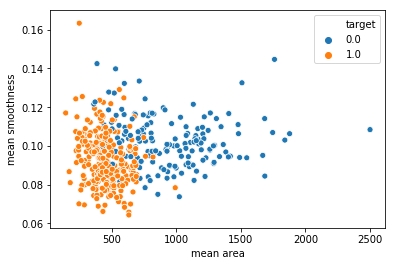

In [150]:
# Visualize original trained data vs. scaled data to confirm the same

sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

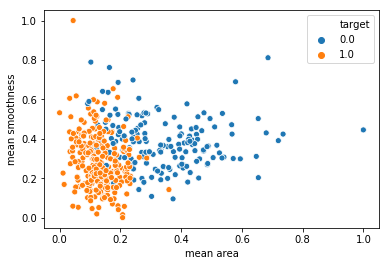

In [152]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)

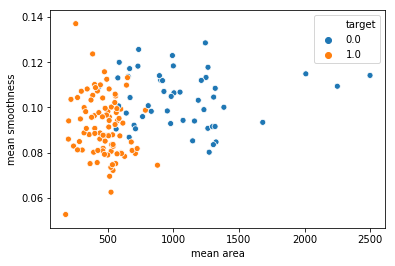

In [155]:
# Plot original test data vs. scaled test data

sns.scatterplot(x = X_test['mean area'], y = X_test['mean smoothness'], hue = y_test)

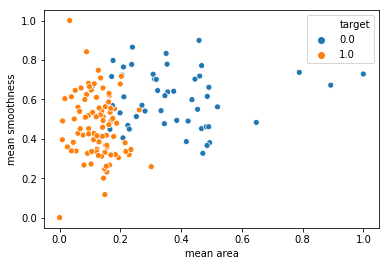

In [156]:
sns.scatterplot(x = X_test_scaled['mean area'], y = X_test_scaled['mean smoothness'], hue = y_test)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        50
         1.0       0.96      0.96      0.96        93

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



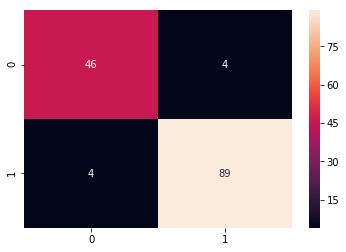

In [158]:
# Retrain model using scaled data

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svc_model = SVC(gamma='auto')
svc_model.fit(X_train_scaled,y_train)
y_predict = svc_model.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict))

In [ ]:
# Accuracy is much higher at ~ 94% after scaling the data